In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [2]:
#Unidade 1
dados_camera = np.load("C:\\Users\\daniel.carvalho\\OneDrive - Mob Serviços de Telecomunicações Ltda\\Área de Trabalho\\scenario1_seq_index_1-2422.npy")
dados_gps1 = np.load("C:\\Users\\daniel.carvalho\\OneDrive - Mob Serviços de Telecomunicações Ltda\\Área de Trabalho\\scenario1_unit1_loc_1-2422.npy")
dados_mmWave = np.load("C:\\Users\\daniel.carvalho\\OneDrive - Mob Serviços de Telecomunicações Ltda\\Área de Trabalho\\scenario1_unit1_pwr_60ghz_1-2422.npy")

#Unidade 2
dados_gps2 = np.load("C:\\Users\\daniel.carvalho\\OneDrive - Mob Serviços de Telecomunicações Ltda\\Área de Trabalho\\scenario1_unit2_loc_1-2422.npy")


print(dados_gps2)
print(dados_mmWave)

[[  33.42054916 -111.9290058 ]
 [  33.42054569 -111.9290057 ]
 [  33.42054224 -111.9290056 ]
 ...
 [  33.4202489  -111.928985  ]
 [  33.42024312 -111.9289844 ]
 [  33.42023732 -111.9289838 ]]
[[0.01730902 0.01840585 0.01912065 ... 0.05110651 0.05873322 0.04869884]
 [0.01645166 0.01769243 0.01889294 ... 0.06078354 0.0716387  0.04498141]
 [0.01660066 0.0179997  0.01909992 ... 0.08145504 0.09183583 0.04442751]
 ...
 [0.02337808 0.12565999 0.24259786 ... 0.02453577 0.02532717 0.0250567 ]
 [0.02617448 0.16347712 0.26710972 ... 0.02410283 0.02356164 0.02191405]
 [0.02534583 0.14362955 0.27882746 ... 0.02268245 0.02171429 0.02398737]]


In [3]:
dados_feixes = np.argmax(dados_mmWave , axis=1)
dados1 = np.column_stack((dados_gps2,dados_gps1))
def indices_n_maiores_valores_por_linha(matriz,n):
    indices_n_maiores_por_linha = []

    for linha in matriz:
        indices_ordenados = np.argsort(linha)[::-1]
        indices_n_maiores = indices_ordenados[:n]
        indices_n_maiores_por_linha.append(indices_n_maiores)

    return np.array(indices_n_maiores_por_linha)
top2=indices_n_maiores_valores_por_linha(dados_mmWave,2)
top3=indices_n_maiores_valores_por_linha(dados_mmWave,3)
top4=indices_n_maiores_valores_por_linha(dados_mmWave,4)
top5=indices_n_maiores_valores_por_linha(dados_mmWave,5)
print (dados1)
print (dados_feixes)
print (top2)
print (top3)
print (top4)
print (top5)




[[  33.42054916 -111.9290058    33.42034722 -111.92915278]
 [  33.42054569 -111.9290057    33.42034722 -111.92915278]
 [  33.42054224 -111.9290056    33.42034722 -111.92915278]
 ...
 [  33.4202489  -111.928985     33.42034722 -111.92915278]
 [  33.42024312 -111.9289844    33.42034722 -111.92915278]
 [  33.42023732 -111.9289838    33.42034722 -111.92915278]]
[62 62 62 ...  5  3  3]
[[62 61]
 [62 61]
 [62 61]
 ...
 [ 5  4]
 [ 3  4]
 [ 3  4]]
[[62 61 63]
 [62 61 60]
 [62 61 60]
 ...
 [ 5  4  6]
 [ 3  4  5]
 [ 3  4  2]]
[[62 61 63 49]
 [62 61 60 63]
 [62 61 60 49]
 ...
 [ 5  4  6  3]
 [ 3  4  5  2]
 [ 3  4  2  5]]
[[62 61 63 49 60]
 [62 61 60 63 49]
 [62 61 60 49 50]
 ...
 [ 5  4  6  3  7]
 [ 3  4  5  2  6]
 [ 3  4  2  5  6]]


In [4]:
X=dados1
Y=dados_feixes
Y1=top2
Y2=top3
Y3=top4
Y4=top5

print (X.shape)
print (Y.shape)
print (Y1.shape)
print (Y2.shape)
print (Y3.shape)
print (Y4.shape)

indices = np.argsort(dados_feixes)[::-1]
print(indices)
dados_feixes[indices[5]]

(2422, 4)
(2422,)
(2422, 2)
(2422, 3)
(2422, 4)
(2422, 5)
[   0  974 2346 ... 1528 1529 1523]


62

In [5]:
sc1 = StandardScaler()
sc1.fit(X)

X_norm = sc1.transform(X)


In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X_norm , Y, test_size=0.6)

X1_train , X1_test , Y1_train , Y1_test = train_test_split(X_norm , Y1, test_size=0.8)
X2_train , X2_test , Y2_train , Y2_test = train_test_split(X_norm , Y2, test_size=0.8)
X3_train , X3_test , Y3_train , Y3_test = train_test_split(X_norm , Y3, test_size=0.8)
X4_train , X4_test , Y4_train , Y4_test = train_test_split(X_norm , Y4, test_size=0.8)

In [7]:
rede = MLPRegressor(hidden_layer_sizes=(500,400,300,10,3) , 
                    max_iter=300000, 
                    tol=0.0000001, 
                    learning_rate_init=0.001 , 
                    solver="adam" , 
                    activation="tanh" , 
                    learning_rate="constant" , 
                    verbose=True,
                    shuffle=True
                   )

reglinear = SGDRegressor(max_iter=300000,
                         tol=0.0000001,
                         learning_rate="constant",
                         verbose=True)



In [8]:
mod = rede.fit(X_train , Y_train)
reglinear.fit(X_train , Y_train)

Iteration 1, loss = 686.16059739
Iteration 2, loss = 667.61582776
Iteration 3, loss = 664.51064326
Iteration 4, loss = 663.02059814
Iteration 5, loss = 661.72691170
Iteration 6, loss = 660.50183193
Iteration 7, loss = 659.37078615
Iteration 8, loss = 658.26497451
Iteration 9, loss = 657.20223290
Iteration 10, loss = 656.17862001
Iteration 11, loss = 655.20283822
Iteration 12, loss = 654.24793793
Iteration 13, loss = 653.33243342
Iteration 14, loss = 652.43341255
Iteration 15, loss = 651.55788920
Iteration 16, loss = 650.70507593
Iteration 17, loss = 649.88068651
Iteration 18, loss = 649.06017109
Iteration 19, loss = 648.25654300
Iteration 20, loss = 647.47507991
Iteration 21, loss = 646.69502725
Iteration 22, loss = 645.93423459
Iteration 23, loss = 645.17565805
Iteration 24, loss = 644.43245621
Iteration 25, loss = 643.70303481
Iteration 26, loss = 642.97327297
Iteration 27, loss = 642.25566479
Iteration 28, loss = 641.54372603
Iteration 29, loss = 640.83291639
Iteration 30, loss = 64

SGDRegressor(learning_rate='constant', max_iter=300000, tol=1e-07, verbose=True)

ACURÁCIA

In [9]:
Y_rede_pred = rede.predict(X_test)
Score_rede = r2_score(Y_test,Y_rede_pred)
print("Acuracia MLP: ", Score_rede*100)

Y_reglinear_pred = reglinear.predict(X_test)
Score_reglinear = r2_score(Y_test,Y_reglinear_pred)
print("Acuracia Regressao Linear: ", Score_reglinear*100)

df_temp = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_rede_pred})
df_temp.head()

Acuracia MLP:  97.1014420416191
Acuracia Regressao Linear:  95.52679782450726


,Actual,Predicted
0,6,5.415139
1,61,53.830398
2,54,53.228367
3,25,24.737025
4,52,53.817357


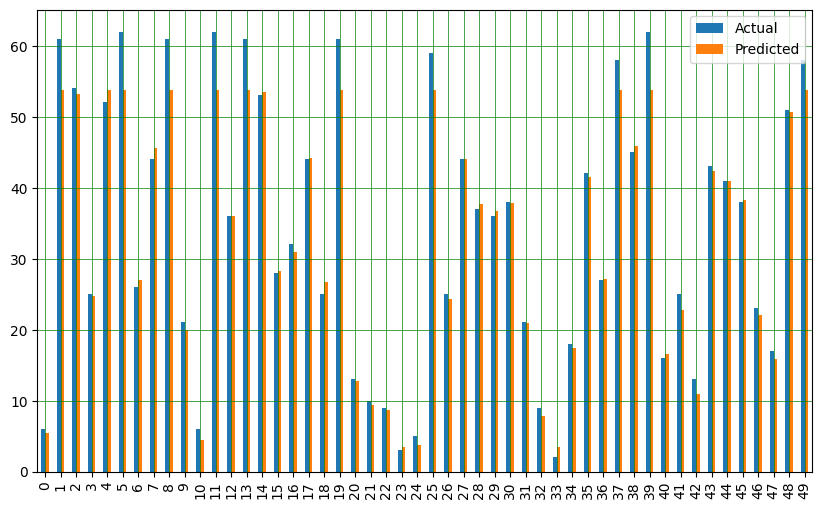

In [10]:
df_temp = df_temp.head(50)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[ 6 61 54 ... 50  6 41]
[ 5.41513916 53.83039793 53.22836687 ... 53.32063424  5.69940847
 41.14356709]
[ 2.90375602 61.17405408 51.92937556 ... 52.65098993  3.7480538
 38.84446122]
(1454,)


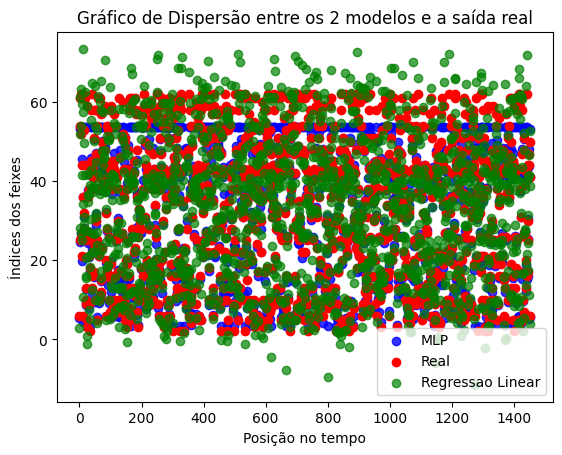

In [11]:
print(Y_test)
print(Y_rede_pred)
print(Y_reglinear_pred)
vet=np.arange(0, 1454, 1)
print(vet.shape)
plt.scatter(vet,Y_rede_pred, alpha = 0.8, color = 'blue', label= 'MLP')
plt.scatter(vet,Y_test, color = 'red',alpha = 1, label= 'Real')
plt.scatter(vet,Y_reglinear_pred, alpha = 0.7,color = 'green',label= 'Regressao Linear')
plt.legend()
plt.xlabel('Posição no tempo')
plt.ylabel('Índices dos feixes')
plt.title('Gráfico de Dispersão entre os 2 modelos e a saída real')
plt.show()


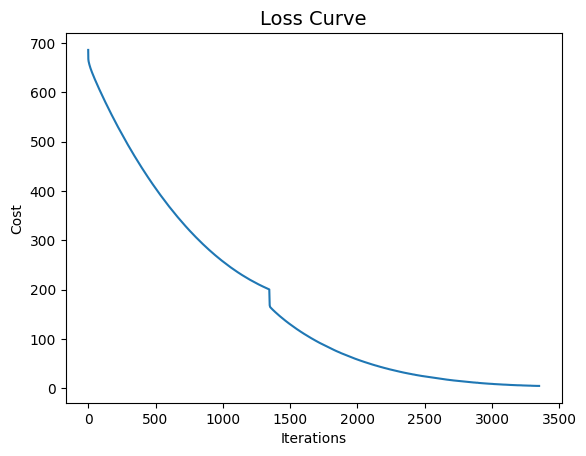

In [12]:
plt.plot(rede.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

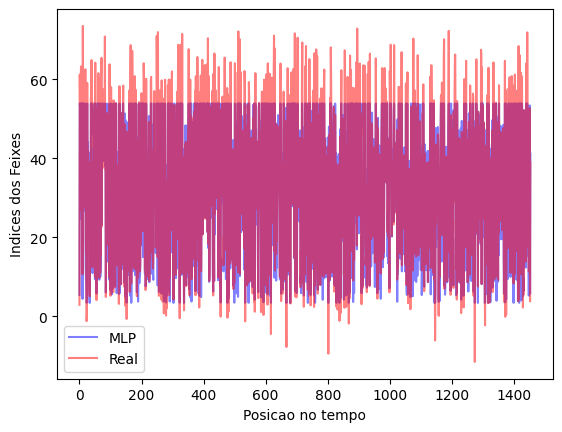

In [13]:
plt.plot(vet, Y_rede_pred, alpha=0.5, color = 'blue', label= 'MLP')
plt.plot(vet, Y_reglinear_pred, alpha=0.5, color = 'red', label= 'Real')
plt.legend()
plt.xlabel("Posicao no tempo")
plt.ylabel("Indices dos Feixes")
plt.show()

In [15]:
results_df = pd.DataFrame({
    'Real': Y_test,
    'MLPRegressor': Y_rede_pred,
    'LinearRegression': Y_reglinear_pred
})

# Ordenando o DataFrame com base nas previsões do MLPRegressor
ranked_mlp = results_df.sort_values(by='MLPRegressor', ascending=False)


# Visualizando os rankings
print("Ranking dos Melhores Feixes - MLPRegressor:")
print(ranked_mlp.head(5))  # 5 melhores feixes para o MLPRegressor

ranked_mlp['Porcentagem_MLP'] = (ranked_mlp['MLPRegressor'] / ranked_mlp['Real']) * 100


# Visualize os rankings com as porcentagens
print("Ranking dos Melhores Feixes - MLPRegressor:")
print(ranked_mlp.head(5))  # Visualize os 10 melhores feixes para o MLPRegressor




Ranking dos Melhores Feixes - MLPRegressor:
      Real  MLPRegressor  LinearRegression
895     62     53.830656         72.789091
331     61     53.830655         71.435497
326     62     53.830652         68.719793
1190    62     53.830643         72.213467
627     62     53.830641         70.996963
Ranking dos Melhores Feixes - MLPRegressor:
      Real  MLPRegressor  LinearRegression  Porcentagem_MLP
895     62     53.830656         72.789091        86.823639
331     61     53.830655         71.435497        88.246976
326     62     53.830652         68.719793        86.823632
1190    62     53.830643         72.213467        86.823617
627     62     53.830641         70.996963        86.823614
